In [1]:
library(ggplot2)
library(maps)
library(mapdata)
library(twitteR)
library(ggmap)


#authenticating twitter

In [2]:
api_key <- "xdmNa3w51Um1fvfW0YfPBBagN"
api_secret <- "Sbh1odevoZOYCQspkTbQn23qkXL6kc6TUJFup61hA3gYNdwmfa"
access_token <- "569718950-rEkmMPchYx88CIoW3pl6vtWyoae5J3Wwm5vEHQyY"
access_token_secret <- "mnRFwO8BNTkWc4Gqm4KaI2AsYQL4TnHioUCPZQPTM3s31"

setup_twitter_oauth(api_key, api_secret, access_token, access_token_secret)

[1] "Using direct authentication"


#getting tweets

In [3]:
tweets <- searchTwitter('#ladygaga', n=10, since="2017-02-10", until="2017-02-15")
tweets

[[1]]
[1] "ksnikiforova252: Lady Gaga - 2015 National Arts Awards https://t.co/hi2135x2i4 #LadyGaga"

[[2]]
[1] "PaperGangsta05: RT @techhausinc: Two years ago \xed\xa0\xbd\xed\xb8\xa2 @ladygaga: He gave me his heart on Valentine's Day, and I said YES! #LadyGaga… https://t.co/alvsqnGCBO"


In [7]:
df <- twListToDF(tweets)

In [8]:
usernames <- df$screenName
new_df <- twListToDF(lookupUsers(usernames))

#removing usernames with no location data

In [9]:
noloc_df <- subset.data.frame(new_df, location!="")

#getting Geocodes

In [2]:
geocodes <- geocode(as.character(noloc_df$location))

#noloc_df <- data.frame(geocodes)

ERROR: Error in stopifnot(is.character(location)): object 'noloc_df' not found


In [3]:
file_path = "finalGeocodes.csv"
hh <- read.table(file=file_path,header=TRUE)

#getting lat-long info, making it into a new dataframe

In [4]:
long <- hh$lon
lat <- hh$lat
loc_info <- data.frame(long, lat)
#long <- noloc_df$lon
#lat <- noloc_df$lat
#print(loc_info)

#eliminating lat-long values outside USA coordinate range

In [5]:
loc_info <- loc_info[((long)<(-75)) & ((long) > (-130)) & (lat) > 22 & (lat) <50,]
long <- loc_info$long
lat <- loc_info$lat

#plotting graph and then translating it into a map

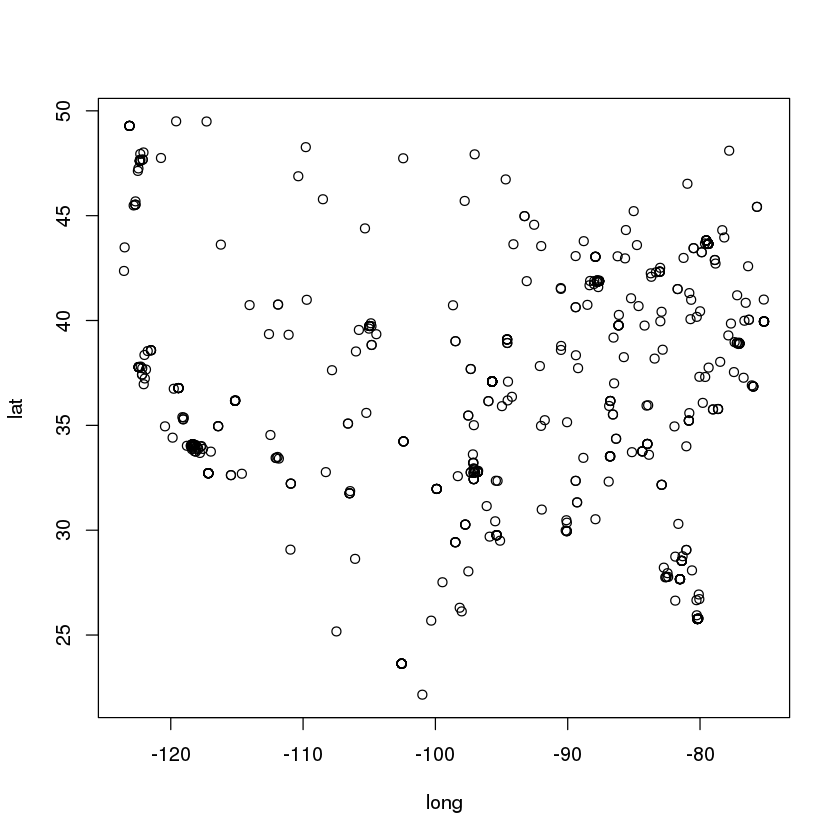

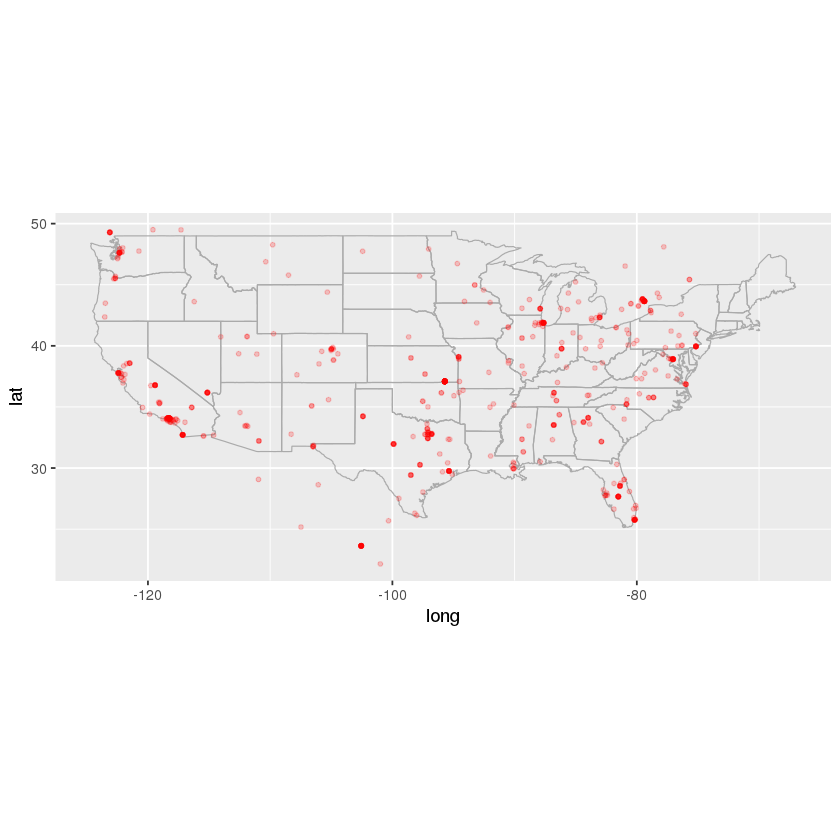

In [6]:
with(loc_info, plot(long, lat))
stateMap <- map_data("state")
plotMap <- ggplot(stateMap)
#Drawing the map
plotMap <- plotMap + geom_path(aes(x = long, y = lat, group = group),colour = gray(2/3), lwd = 1/3)
#plotting points
plotMap <- plotMap + geom_point(data = loc_info,aes(x = long, y = lat),colour = "RED", alpha = I(0.2), size = 1)
plotMap <- plotMap + coord_equal()  

print(plotMap)

#References:
http://sape.inf.usi.ch/quick-reference/ggplot2/geom_point
http://docs.ggplot2.org/0.9.3.1/geom_path.html
https://dev.twitter.com/rest/public/search
http://geoffjentry.hexdump.org/twitteR.pdf
https://cran.r-project.org/web/packages/twitteR/twitteR.pdf
Referred to various websites(Google)for standard R syntax help.